# 3.1 The `xarray` Library

:::{admonition} Lesson Content
:class: note, dropdown

- 🗃️ Libraries
- Gridded data and `xarray`
- `xarray` Datastructures
- Indexing and selecting values
- Filepaths

:::

## Context

Today we are getting to our core raster library - `xarray`.  `xarray` is a great library for working with gridded datasets. It has many built in analysis methods, nice visualization defaults, and it was built by the scientific community. `xarray` is built on top of another library called `numpy`. `xarray` takes the `numpy` arrays and makes them easier to work with by adding labels to the axes. This is a small change but it has a huge effect on the ease of working with data.

Other xarray tutorials:
* [UW Geohackweek](https://geohackweek.github.io/nDarrays/)
* [Oceanhackweek/Scipy 2020](https://xarray-contrib.github.io/xarray-tutorial/)

![Summary Slide](./images/summary_xarray.jpg)

## 🗃️ Libraries

Today we are going to dig into our first library in Python!  A **library** is a like an "extras" package for a programming language (think Settlers of Catan expansion pack).  It is a set of commands that doesn't automatically come activated when you start Python, but that you can use if you tell Python that you plan to do so.  You let Python know you are going to use a library with an `import` statment.  After you do that the additional commands become availble. Let's try this out with an example from the `math` library.

In [1]:
# Attempting to use the `math` libray before importing
math.factorial(3)

NameError: name 'math' is not defined

In [2]:
# Import the Python library
import math

In [3]:
# Attempt #2 to use the `math` libray (after importing)
math.factorial(3)

6

Once we have imported the library we can use the new commands that the library contains.  The `math` library was just an example and it isn't the focus of this lesson, but if you want you can see a list of `math` commands [here](https://docs.python.org/3/library/math.html).

:::{admonition} Vocabulary
:class: tip
**Library:** additional coding objects (Ex. functions, data structures) that you can make available to in your notebook by importing them
:::

:::{admonition} 🌀 More Info: Standard vs. Non-standard Libraries
:class: note, dropdown

One large chunk of libraries are together referred to as the **Python Standard Library**. These libraries are not a part of the "core" language (everything we can do without import statments) but have still been offically accepted into the Python distribution package and are maintained in the same way as the rest of the core language.  You can read more [here](https://docs.python.org/3/tutorial/stdlib.html).

There are also libraries which aren't a part of this designation, and are still widely used and developed, but they are simply not included when you hit the "Download Python" button.  Non-standard libraries are maintained by groups of developers outside of the Python Software Foundation and anyone can make one.  That includes you!

:::

## Data Cubes

xarray is a library that allows us to manipulate **multidimensional data**. If you've taken linear algebra you might already be familiar with what that means. Multidimensional data is data that is organized using dimensions. Data can be 1-, 2-, or 3-dimensional, and can even be 4-, or 5-dimensional, and higher. Multidimensional data can be difficult to visualize if you haven't worked with it before, so before diving into code let's start by understanding multidimensional data visually first.

Let's start visualizaing a dataset where each number is represented by a little box like this:

![Data Element](./images/data_element.jpg)
<!-- <img src="images/data_element.jpg" width="330" /> -->
<!-- <img src="./images/data_element.jpg" width="200"/> -->

From now on every time you see a little box like this is represents a single data value (ex. an value for wind speed, water temperature, soil moisture, $CO_2$ concentration, etc.)

A one-dimensional dataset would be represented like this:

![1D Array](./images/1d_array.jpg)

Notice how the numbers aren't randomly placed, they are organized by a single dimension. In addition to dimensions we also often talk about the shape of a data array. The **shape** tells us how many values there are along each dimension of the dataset. The array above has a shape of `(9)`, because there are 9 values.

An example of a 1-dimensional dataset might be time series data from an ocean buoy showing water temperatures at each hour over the course of one day. (For the sake of space there are fewer boxes in the array than there are on the plot, but know that each dot on the plot would correspond to one box in a data array).

![1D Array with Example Data](./images/1d_array_and_plot.jpg)

This data is one dimensional because it is organized using one coordinate axis, which in this case is _time_.

If we were to use Python to represent this data we would need to specify one index to get a single value out of the dataset. 

In [4]:
# 1D Python data
water_temp = [15, 64, 23, 42, 34]

print("Third temperature value:", water_temp[2])

Third temperature value: 23


Two dimensional data has two dimensions, meaning data is organized using two sets of coordinates.

![2D Array](./images/2d_array.jpg)

The array above has a shape of `(9, 6)` because there are 9 values along the first dimensions and 6 values along the second dimension.

An example of 2D data might be sea surface temperatures over a region of the Pacific Ocean.

![2D Array with Example Data](./images/2d_array_and_plot.jpg)

In this example the two dimesions are _latitude_ and _longitude_.

If we were to use Python to represent this data we would need to use two indices to get one value out of the dataset.

In [5]:
# 2D Python data
sst = [[15, 64, 23, 400], [304, 305, 300, 410]]

print("One temperature value:", sst[1][2])

One temperature value: 300


We can continue to make our data into more complex structures by adding additional dimensions. Here is an example of 3-dimensional data.

![3D Array](./images/3d_array.jpg)

The array above has the shape `(5, 9, 6`).

In [6]:
co2 = [[[15, 64, 23, 400], [304, 305, 300, 410]], [[15, 64, 23, 400], [304, 305, 300, 410]]]

print("One CO2 value:", co2[0][1][3])

One CO2 value: 410


Now you may think that is the end of it, since we exist in three dimensions, but in math (and computer science) the concept of a "dimension" can continue into 4th, 5th, 6th dimensions and beyond. It doesn't make complete sense to visualize these things in space, but from a math and coding perspective we can continue to organize data into structures that can be described using 4, 5, and 6 dimensions.

The Python access would look like:

In [7]:
fourD = [[[[14, 15, 15], [34, 34, 34]], [[14, 15, 15], [34, 34, 34]]], [[[14, 15, 15], [34, 34, 34]], [[14, 15, 15], [34, 34, 34]]]]

In [8]:
print("One CO2 value:", fourD[1][0][1][2])

One CO2 value: 34


Does that long line of a list of a list of a list of a list look pretty ugly and hard to navigate to you? Good. Then you'll appreciate the benefit of xarray.

## Gridded data and `xarray`

### `xarray` Data Structures

`xarray` allows us to work with labelled, multi-dimensional data. What does that mean? There are two parts:
1. **multi-dimensional** - the data is organized into a grid and can have any number of dimensions. For example, data might be organized by latitude, longitude, and altitude (3 dimensions). This is often visually represented as a cube of data
2. **labelled** - the cube of data isn't just any old cube - each dimension has associated values. For example, we know the values of latitude, longitude, and altitude that the data is describing

That's all a bit abstract, but let's create some `xarray` objects to dig more into how this works.

## Core Data Structure: `DataArray`

The first core `xarray` data structure is a `DataArray`. Let's make a `DataArray` with some fake data for air temperature. We will need:
* values for temperature
* we need to know that our data is arranged by `latitude` and `longitude` 
* exactly which latitudes and longitudes our data are showing

To use a library in Python we first need to **import** it. That's how you tell Python you want to be able to access those extra "features" that the library has in it. For xarray the import statement cannonically looks like this:

In [9]:
import xarray as xr

Now let's make a `DataArray`.

In [10]:
# Data values
air_temps = [
    [80, 80, 81, 83, 82, 80], [81, 80, 81, 83, 83, 82], [81, 81, 83, 84, 84, 83], 
    [79, 80, 83, 85, 85, 85], [78, 77, 80, 85, 86, 87]
]
# Coordinate values
lats = [36, 37, 38, 39, 40]
lons = [-80, -79, -78, -77, -76, -75]
# Assemble the DataArray
temps = xr.DataArray(data=air_temps, dims=['latitude', 'longitude'], coords=[lats, lons],)

Don't worry too much about every line of the big code block above. You'll rarely ever need to create your own `DataArray`, as the most common thing is to open data from a file. More importantly, let's see what all that code created:

In [11]:
temps

<xarray.DataArray (latitude: 5, longitude: 6)> Size: 240B
array([[80, 80, 81, 83, 82, 80],
       [81, 80, 81, 83, 83, 82],
       [81, 81, 83, 84, 84, 83],
       [79, 80, 83, 85, 85, 85],
       [78, 77, 80, 85, 86, 87]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75

What has xarray given us? An `xarray` `DataArray`. We get a nice output, and notice that it is clickable. We can see in the output that a `DataArray` has three major components:
1. `data` - values for temperature
2. `dims` - (_short for dimensions_) indicates that our data is arranged by `latitude` and `longitude`
3. `coords` - (_short for coordinates_) the values for latitude and longitude

The figure below shows where to find these three components in the xarray output. We see that this data is organized by latitude and longitude. The data covers 5 latitudes and 6 longitudes. The exact location of our data is shown in the coordinates, and the observed temperature values are listed in the main data array.

![xarray dataarray html output labelled](./images/labelled_html.png)

What does the data look like? We can use xarray's `.plot()` method to look at the data as a graphic.

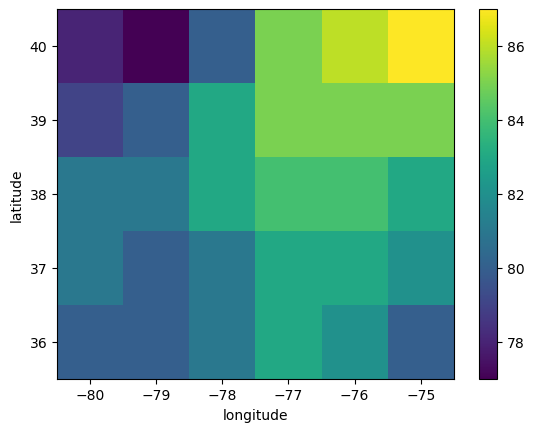

In [12]:
temps.plot()

We've created a plot of our temperature data! Each box of data is called a **pixel** and each pixel is colored to show the corresponding temperature value. We can see that the highest tempeatures are in the northeast corner of this plot while the lowest values are in the northwest corner.

And notice 🚨! We don't just have a random set of 30 temperature values. We have temperature values that represent a certain geographic location. Where is this data located? Where in the world is about $36-40^\circ$N and $75-80^\circ$W?

![study area map](./images/sample_geography.png)

Right about here.

So, if we were to summarize the fake data we just made, we could say that we made data showing: 

> air temperature values over Virginia and Maryland

### Summarizing datacube visualization

In the past few minutes we have now seen three different ways to visualize multidimensional data. We have:
1. The output from an xarray DataArray
2. A plot of two dimensional data
3. The graphical representation from earlier in this lesson

One of these three ways of visualizing may click better for you than others, and that's great. Going forward we will use a mixture of these representations, but remember that in the end they all represent the same thing: environmental data.

![2D Data Representations: xarray HTML, plot, schematic](./images/2d_data_representations.jpg)

### Attributes/Properties

In the example we have given here we know our dimensions and coordinates because we made the DataArray. But if you open a new dataset you may not be so sure. If you ever need to figure out what the dimenions or coordinates of a DataArray, they can each be accessed using a period `.`, called dot notation. Accessing information about an object using a `.` is called accessing an **attribute** or a **property** of an object. In the analogy between spoken languages and programming languages, where objects are nouns and functions are verbs, I think of attributes as adjectives.

In [13]:
print('DIMS', temps.dims)
print('COORDS', temps.coords)
print('DATA', temps.data)

DIMS ('latitude', 'longitude')
COORDS Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75
DATA [[80 80 81 83 82 80]
 [81 80 81 83 83 82]
 [81 81 83 84 84 83]
 [79 80 83 85 85 85]
 [78 77 80 85 86 87]]


> Objects -> Nouns;
> 
> Functions -> Verbs;
> 
> Attributes/Properties -> Adjectives

:::{admonition} Vocabulary
:class: tip
**Property** or **Attribute:**  Information attached to a data structure that describes it (Ex. the size of an array). Usually accessed with dot notation (`my_dataarray.my_property`)
:::

### `dims` vs. `coords` [optional]

Although they are not the same thing, if this is your first time learning about `xarray` you can think of them as the same thing for now. In the practice we will look at some examples that will help us get a more intuitive sense for how dimensions and coordinates are different.

The difference between `dims` and `coords` can be tricky but time and examples can make that clearer. One thing that can also be helpful is to omit the `dims` or `coords` argument from array creation to see how the output changes. Neither argument is required, so feel free to try that on your own.

## 3D Array

The process we just went through can be repeated for arrays of increasing size.  Here is what a 3D DataArray would look like.

In [14]:
import numpy as np

In [15]:
# Define the data
temperature_3d_values = np.random.randint(0, high=75, size=(3, 4, 6))

# Define the coordinates
altitude = [0, 500, 1000]
lats = [33, 34, 35, 36]
lons = [-122, -121, -120, -119, -118, -117]

# Assemble the DataArray
temperature_3d = xr.DataArray(temperature_3d_values, 
                      dims=['altitude', 'latitude', 'longitude'], 
                      coords=[altitude, lats, lons]
                     )
temperature_3d

<xarray.DataArray (altitude: 3, latitude: 4, longitude: 6)> Size: 576B
array([[[11, 19, 35, 33, 52, 49],
        [36, 67, 20, 51,  8,  3],
        [ 4, 19, 18,  4, 56,  7],
        [18, 64, 39, 25,  5, 46]],

       [[26, 69, 10, 13, 57, 61],
        [13, 13, 57, 52, 13, 16],
        [ 9, 29, 50, 66, 19, 51],
        [64, 48, 18, 25, 50, 15]],

       [[53, 57, 33, 35, 64, 38],
        [38, 45, 15, 47, 45, 55],
        [56, 40,  4,  1, 42, 73],
        [42, 37, 67, 35, 45, 53]]])
Coordinates:
  * altitude   (altitude) int64 24B 0 500 1000
  * latitude   (latitude) int64 32B 33 34 35 36
  * longitude  (longitude) int64 48B -122 -121 -120 -119 -118 -117

Or, conceptually:

![Conceptual Drawing 3D Data](./images/fake_data_3d.jpg)

:::{admonition} 📝 Check your understanding
:class: tip

The following `DataArray` contains values for wind speeds. What are the dimensions? What are the coordinates? What is the highest and lowest wind speed in the array?

![example output](./images/example_2d_repr.png)

:::

In [16]:
# wind_speed = np.random.randint(0, high=80, size=(5, 3))
# wind_speed = [[8, 12,7 ], [40, 42, 37], [71, 71, 80,], [106, 98, 111],]
# pressure = [1000, 750, 500, 350]
# lons = [-80, -79, -78]
# wind_speed = xr.DataArray(wind_speed, dims=['pressure', 'longitude'], coords=[pressure, lons])

# wind_speed

## Indexing and Selecting Values

One of the great things about having labelled data is that we can use the labels to extract a smaller amount of data from a larger dataset. This process of extracting some data from a larger amount of data is called subsetting. **Subsetting** is the process of taking a large dataset and picking out just the bit of data that you need for your analysis. We do this in `xarray` using the `.sel()` selection syntax.

As an example, we we could ask the question "_What is the air temperature at 37$^\circ$N and 19$^\circ$E?_"

In [17]:
# Get the value of the array where latitude is EQUAL TO 37 and longitude is EQUAL TO -19
temps.sel(latitude=37, longitude=-79)

<xarray.DataArray ()> Size: 8B
array(80)
Coordinates:
    latitude   int64 8B 37
    longitude  int64 8B -79

Look at that! We found the temperature value at 37$^\circ$N and 19$^\circ$E -- it's 17$^\circ$C.

Now often you want to find not just a single value, but data over a larger area. For example, maybe the data file that you downloaded has data for the whole world but you only want data over the state of California. To achieve that we use a `slice()`.

In [18]:
# Select all the data between (and including) 37 and 39 degrees north
temps.sel(latitude=slice(37, 39))

<xarray.DataArray (latitude: 3, longitude: 6)> Size: 144B
array([[81, 80, 81, 83, 83, 82],
       [81, 81, 83, 84, 84, 83],
       [79, 80, 83, 85, 85, 85]])
Coordinates:
  * latitude   (latitude) int64 24B 37 38 39
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75

![Graphic of select with slice](./images/select_example1.jpg)

Notice, how does the shape of this dataset compare to the full dataset? Before we had an array of shape 5 x 6, with 5 latitudes and 6 longitudes. It was a 2-dimensional array. Now we still have a 2-dimensional array, but it is a smaller array. We have an array of shape 3 x 6, with 3 latitudes and 6 longitudes.

:::{admonition} 📝 Check your understanding
:class: tip


What is the shape of the output DataArray in each of the following selections? Use (latitude, longitude) order

1 - `temps.sel(latitude=38, longitude=-75)`

2 - `temps.sel(latitude=0)`

3 - `temps.sel(longitude=slice(-79, -78))`

:::

### Subsetting by Index

Selecting by label is the most common way to use xarray, but sometimes you still want to use an index. When we talked about selecting data in lists we talked about a data **index**. Indexes let us say "_I want the first, second, and third elements_". `xarray` also lets you select data by index, but the syntax is different. Instead of square brackets we use the `.isel()` method and we give the names of our dimensions as arguments. 

In [19]:
temps.isel(latitude=0, longitude=3).data

array(83)

The code we wrote above says "_Please give me the temperature value that corresponds to the 1st latitude and the 4th longitude_".

The return value from indexing is always another DataArray. This is true even if the return has just 1 value in it. At any point you are working with a DataArray you can get the numpy array of the data values using `.values` or `.data`.

One great thing to notice about this approach is that we didn't have to keep track of whether latitude or longitude was the first dimension in the array. We gave `latitude` and `longitude` as arguments and `xarray` knew how to to use that information.

We can see this even more clearly by noticing that we can switch the arguments and get the same result.

In [20]:
temps.isel(longitude=3, latitude=0)

<xarray.DataArray ()> Size: 8B
array(83)
Coordinates:
    latitude   int64 8B 36
    longitude  int64 8B -77

We don't have to select using all of the dimensions of the dataset. A graphic representaiton of this select process is shown below.

In [21]:
temps.isel(longitude=3)

<xarray.DataArray (latitude: 5)> Size: 40B
array([83, 83, 84, 85, 85])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
    longitude  int64 8B -77

![Graphic of select from the exampe](./images/select_example2.jpg)

Notice that we started with a 2-dimensional dataset but we get back a 1-dimensional array.

### (optional) `numpy`-like selection syntax

I'll point out that `xarray` does allow you to select data using the same syntax as `numpy` (square brackes and indexes in a particular order). This is a totally valid way to select data, but I tend to avoid it because it doesn't take advantage of the convenience that `xarray` as a library is providing.

In [22]:
temps[0, 3]  # returns a DataArray

<xarray.DataArray ()> Size: 8B
array(83)
Coordinates:
    latitude   int64 8B 36
    longitude  int64 8B -77

In [23]:
temps[:, 0:2]

<xarray.DataArray (latitude: 5, longitude: 2)> Size: 80B
array([[80, 80],
       [81, 80],
       [81, 81],
       [79, 80],
       [78, 77]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 16B -80 -79

In [24]:
temps[0, 3].data  # returns a numpy array

array(83)

:::{admonition} 📝 Check your understanding
:class: tip

What would be the output sst values of the following lines of code?

1. `sst.isel(latitude=2, longitude=1)`
2. `sst.sel(latitude=38, longitude=-21)`
3. `sst.isel(latitude=2).sel(longitude=-21)`

:::

## Core Data Structure: `Dataset`

The other core data structure in `xarray` is a `Dataset`, which is a group of `DataArray`s.

To look at a `Dataset` let's go back to our example of air temperature in Virginia and Maryland. Let's say that in addition to air temperature temperature we also have data for humidity.

In [25]:
# Create DataArray for chlorophyll-a
windspeed_values = np.random.uniform(4, high=13, size=(5, 6))
# Assemble the Dataset
air_dataset = xr.Dataset(
    data_vars={"temperature": temps, "wind_speed": (("latitude", "longitude"), windspeed_values)}
)

air_dataset

<xarray.Dataset> Size: 568B
Dimensions:      (latitude: 5, longitude: 6)
Coordinates:
  * latitude     (latitude) int64 40B 36 37 38 39 40
  * longitude    (longitude) int64 48B -80 -79 -78 -77 -76 -75
Data variables:
    temperature  (latitude, longitude) int64 240B 80 80 81 83 82 ... 80 85 86 87
    wind_speed   (latitude, longitude) float64 240B 5.585 12.89 ... 9.551 7.417

In the output we see that we have a new section: Data Variables where both temperature and wind speed are listed! The coordinates and dimensions are also maintained.

![xarray dataset html output labelled](./images/labelled_html_dataset.png)

Again, I'm not explaining in detail the line where I created the Dataset because in real life you likely won't be creating your own datasets. Instead you'll be reading in data that someone else collected. Therefore, at this point, the most important thing to be comfortable with is being able to look at the output of a created Dataset and understand what it contains.

You can access different DataArrays within the Dataset with either `['']` sytax or `.` syntax.

In [26]:
air_dataset['temperature']

<xarray.DataArray 'temperature' (latitude: 5, longitude: 6)> Size: 240B
array([[80, 80, 81, 83, 82, 80],
       [81, 80, 81, 83, 83, 82],
       [81, 81, 83, 84, 84, 83],
       [79, 80, 83, 85, 85, 85],
       [78, 77, 80, 85, 86, 87]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75

In [27]:
air_dataset.temperature

<xarray.DataArray 'temperature' (latitude: 5, longitude: 6)> Size: 240B
array([[80, 80, 81, 83, 82, 80],
       [81, 80, 81, 83, 83, 82],
       [81, 81, 83, 84, 84, 83],
       [79, 80, 83, 85, 85, 85],
       [78, 77, 80, 85, 86, 87]])
Coordinates:
  * latitude   (latitude) int64 40B 36 37 38 39 40
  * longitude  (longitude) int64 48B -80 -79 -78 -77 -76 -75

## Real Data

The small dataset we made manually in the first part of this notebook is quite useful for learning. Usually, though, you won't be making your own data, you'll be opening other datasets. Let's try an example of that using a local file. Here we open up the dataset [NASA MUR](https://podaac.jpl.nasa.gov/dataset/MUR25-JPL-L4-GLOB-v04.2). This is a sea surface temperature dataset. 

We are opening up a MUR file stored locally, but you could re-download this file yourself from earthdata search.

One command to open a datasets is `xr.open_dataset()`, shown below.

In [28]:
import xarray as xr

In [29]:
sst = xr.open_dataset(
    './data/20250503090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc'
)

In [30]:
sst

<xarray.Dataset> Size: 37MB
Dimensions:           (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time              (time) datetime64[ns] 8B 2025-05-03T09:00:00
  * lat               (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.62 89.88
  * lon               (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    analysed_sst      (time, lat, lon) float64 8MB ...
    analysis_error    (time, lat, lon) float64 8MB ...
    mask              (time, lat, lon) float32 4MB ...
    sea_ice_fraction  (time, lat, lon) float64 8MB ...
    sst_anomaly       (time, lat, lon) float64 8MB ...
Attributes: (12/54)
    Conventions:                CF-1.7, ACDD-1.3
    title:                      Daily 0.25-degree MUR SST, Interim near-real-...
    summary:                    A low-resolution version of the MUR SST analy...
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    ...                         ...
    publisher_name:             GHRSST Project Office
    publisher_url:              https://www.ghrsst.org
    publisher_email:            gpc@ghrsst.org
    file_quality_level:         3
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    acknowledgment:             Please acknowledge the use of these data with...

A new thing you will notice about this real dataset is that it has Attributes. Attributes are information about the data that isn't actually the data itself. These are also called **metadata**. Metadata is data about your data, but it isn't the actual data. Datasets and DataArrays can both have attributes.

Additionally, the dataset is large enough that not all the values can be shown in the output. When this happens xarray leaves some values out and denotes that with `...`. You can see an example of this in the `lat` coordiante, where the first and last two latitudes are shown with `...` in the middle to show you that some data was left out.

:::{admonition} Vocabulary
:class: tip
**Metadata:** information that describes your data, but isn’t the actual data values
:::

:::{admonition} 📝 Check your understanding
:class: tip

Describe the data we just opened. Answer:
- What is the data structure?
- How many dimensions does it have and what is the shape?
- How many variables are there? What are they?
- What geographic area is covered by this dataset? On what date(s) was data captured? 
:::

### Filepaths

Your computer is organized **hierarchically**.
![File Structure](./images/computer_structure.png)

Figure from [ResearchGate](https://www.researchgate.net/figure/Overview-of-structure-of-folders-for-tool_fig1_332775326)

The other part of that data loading statement to take note is the `'./data/20250503090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc'` part.  This is called the **filepath** and it is a string that describes the location of the data that you want to open.  A few pieces of the anatomy of a filepath to notice:
* `/` - forward slashes signal that you have entered a new folder. (Windows machines natively use a back slash `\`, but the Anaconda powershell can handle either)
* `.nc` - this is the file extension, which tells us what type of file format the data is stored in an informs us how we open it
* `.` - the period at the beginning tells the computer to start looking for data in the same place that the code is being run in.  

Choosing to start your filepath with a `.` is called specificying a **relative filepath**, because you are telling the computer to start looking for the file relative to where the file is being run. If you move this file to another place on your computer and don't move the data with it the import statment won't work anymore.  The alternative to a relative filepath is an **aboslute filepath**, in which case you start your file path at the very tippy top of your computer's organizational structure (the root directory).

Other vocab notes:
* **directory** is the same thing as a folder.

To loop back to our example, we put together our filepath by defining the following directions for our computer:
1. start by specifing the current directory as the starting point: `.`
2. go into the data folder: `./data`
3. choose the file named 20250503090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc: `'./data/20250503090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc'`

🎉 And there we have our file

:::{admonition} Vocabulary
:class: tip
**Filepath:** A string that describes the location of a file on a computer. Filepath can be either relative, with respect to a particular file, or absolute, with respect to the highest file in the file structure.

:::

:::{admonition} 📝 Check your understanding
:class: tip

Say you are working in the folder structure shown in the image above. 

What is the absolute relative filepath from the code file `PARAMETER2.R` to the data file `CountryDataset`?

:::

### Inspecting the data

Right after I open the dataset the first thing I almost always do it plot it. That helps me orient to the data and confirm that what I think is present is indeed present. We can do this in `xarray by running `.plot()` on a DataArray.

In [31]:
sst.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

Oops, an error. Let's look at the error we got: `ValueError: Dataset.plot cannot be called directly`. Reading error messages is a big part of programming. You may not understand every bit of an error message, but it's good to practice extracting a big idea from the error. Here we see that xarray doesn't like that we have given the `.plot()` method a `Dataset`. What if we gave it a `DataArray` instead?

Let's extract the `analysed_sst` variable:

In [32]:
sst['analysed_sst']

<xarray.DataArray 'analysed_sst' (time: 1, lat: 720, lon: 1440)> Size: 8MB
[1036800 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-05-03T09:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    long_name:              analysed sea surface temperature
    standard_name:          sea_surface_foundation_temperature
    coverage_content_type:  physicalMeasurement
    units:                  kelvin
    valid_min:              -32767
    valid_max:              32767
    comment:                Interim near-real-time (nrt) version using Multi-...
    source:                 MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G...

Notice that this is now a `DataArray`. Now let's try the `.plot()` again.

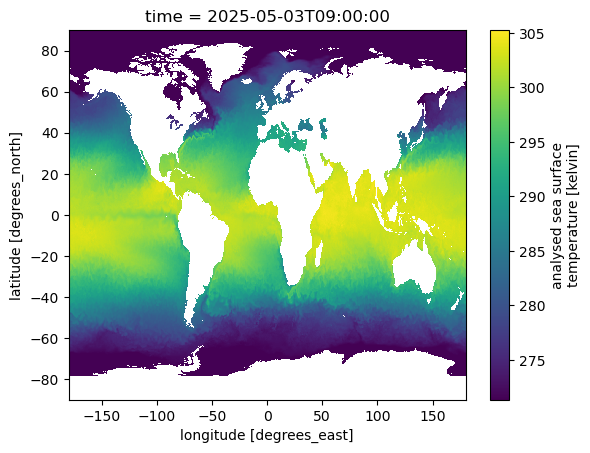

In [33]:
sst['analysed_sst'].plot()

What a lovely dataset! 🙂 🌊 🌡

### Subsetting

What if we just wanted a small section of that dataset? For example, just the Atlantic? We can use the `.sel()` notation along with the desired latitudes and longitudes to zoom into just that data, just as we did in the example earlier in the notebook.

In [34]:
sst['analysed_sst']

<xarray.DataArray 'analysed_sst' (time: 1, lat: 720, lon: 1440)> Size: 8MB
[1036800 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-05-03T09:00:00
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    long_name:              analysed sea surface temperature
    standard_name:          sea_surface_foundation_temperature
    coverage_content_type:  physicalMeasurement
    units:                  kelvin
    valid_min:              -32767
    valid_max:              32767
    comment:                Interim near-real-time (nrt) version using Multi-...
    source:                 MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G...

In [35]:
sst['analysed_sst'].sel(lat=slice(5, 65), lon=slice(-85, -36))

<xarray.DataArray 'analysed_sst' (time: 1, lat: 240, lon: 196)> Size: 376kB
[47040 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2025-05-03T09:00:00
  * lat      (lat) float32 960B 5.125 5.375 5.625 5.875 ... 64.38 64.62 64.88
  * lon      (lon) float32 784B -84.88 -84.62 -84.38 ... -36.62 -36.38 -36.12
Attributes:
    long_name:              analysed sea surface temperature
    standard_name:          sea_surface_foundation_temperature
    coverage_content_type:  physicalMeasurement
    units:                  kelvin
    valid_min:              -32767
    valid_max:              32767
    comment:                Interim near-real-time (nrt) version using Multi-...
    source:                 MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G...

Look at the output above. Can you see that it is smaller? (Hint: check the size of the _lat_ and _lon_ dimensions)

Want another way to double check that we selected just the Atlantic Ocean? Try plotting the data:

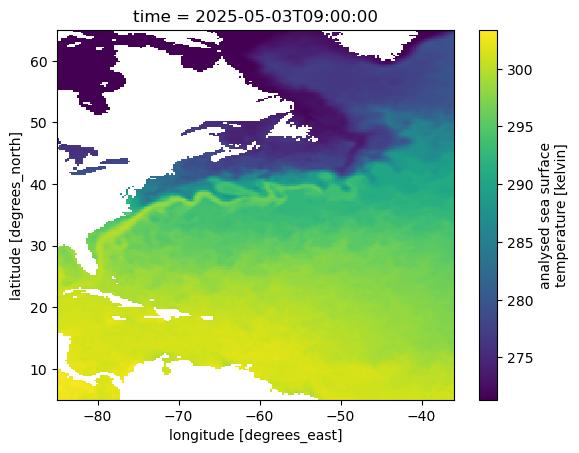

In [36]:
sst['analysed_sst'].sel(lat=slice(5, 65), lon=slice(-85, -36)).plot()

## [optional] Connecting it back: Arrays of Data

**_This section draws a connection between numpy arrays and xarray DataArrays. Consider reading this section if you already know what a `numpy` array is._**

`xarray` provides labels around `numpy` data arrays. `numpy` arrays have some similarities to the lists we talked about yesterday, but they differ in a few ways:

1. `numpy` arrays usually contain values that are all of the same type
2. `numpy` arrays can have multiple dimensions
3. `numpy` arrays are highly optimized for performance

Let's start by making a small array.

In [37]:
import numpy as np

In [38]:
my_first_array = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8], [9, 10, 11]])
my_first_array

array([[ 1,  2,  3],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

There we have it, a small array! The array has 2 dimensions, which we can see by checking the `shape` attribute of an array.

In [39]:
my_first_array.shape

(4, 3)

You can index an array using the same syntax as a list. The biggest change from a list to an array is now that we have multiple dimensions we can use multiple indices.

In [40]:
my_first_array[0, 1]

2

How did we know which number should come first? We have to keep track on our own about what is being represented on each axis. The index goes in row, column order, so `my_first_array[0, 1]` and `my_first_array[1, 0]` do no return the same result.

Additionally, we can choose to index by just 1 of the 2 dimensions. This will return an array with more than 1 number in it.

In [41]:
my_first_array[1]

array([3, 4, 5])

> xarray provides an extra layer of detail on top of a numpy array. With numpy arrays you need to keep track of what each axis represents (ex. time, latitute, elevation). With xarray you can ask for elements based on the names of each axis

In [42]:
# Getting the element at 30 deg N and 50 deg W in numpy
# TODO not complete
array = np.array([[4, 6, 3], [6, 2, 3]])

:::{admonition} 📝 Check your understanding
:class: tip

Consider the following array called `pressure`.

```
pressure = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]], [[9, 10], [11, 12]])
```

Write a line of code to programatically determine how many dimensions the array has.

:::

:::{admonition} 📝 Check your understanding
:class: tip

Consider the following operation on the `pressure` array.

```
pressure[1]
```

How many dimensions will the resulting data array have? Consider the number of indexes we are using.

a) 0

b) 1

c) 2

d) 3

e) 4

:::

`numpy` is a great tool for dealing with data in multiple dimensions. It can get to be cumbersome, however, to keep track of indexes once you have 2, 3, 4+ dimensions. To help us with this part, we switch to `xarray`.